In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random 
from math import radians, cos, sin, asin, sqrt
dataset =  pd.read_csv("real_estate_db.csv")

print("The number of rows:", dataset.shape[0])
print("The number of columns:", dataset.shape[1])

The number of rows: 39030
The number of columns: 80


In [2]:
data = dataset[['STATEID','type','pop','rent_mean','hi_mean','family_mean','hc_mortgage_mean','hc_mean','debt','hs_degree','male_age_mean','female_age_mean','male_age_samples','female_age_samples']]
data["mean_age"] = (data["female_age_mean"]*data["female_age_samples"]+data["male_age_mean"]*data["male_age_samples"])/(data["male_age_samples"]+data["female_age_samples"])
data = data.drop(columns=["male_age_mean","male_age_samples","female_age_mean","female_age_samples"],axis = 1)


/Users/kongfanchao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


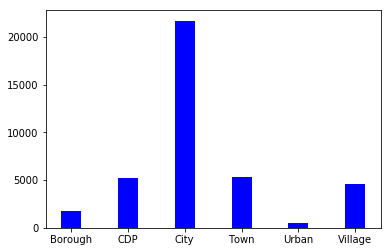

In [3]:
Bor = len(data[data["type"] == 'Borough'])
CDP = len(data[data["type"] == 'CDP'])
City = len(data[data["type"] == 'City'])
Town = len(data[data["type"] == 'Town'])
urban = len(data[data["type"] == 'Urban'])
village = len(data[data["type"] == 'Village'])

typeNum = (Bor, CDP, City, Town, urban, village)
plt.bar(np.arange(6), typeNum, 0.35, color='b') 
plt.xticks( np.arange(6),('Borough', 'CDP', 'City', 'Town', 'Urban','Village'))
plt.show()

In [4]:
data = data[data["type"] == "City"]
data = data.drop(columns="type")
data.describe()

In [5]:
data.isnull().sum()

STATEID               0
pop                   0
rent_mean           285
hi_mean             239
family_mean         264
hc_mortgage_mean    477
hc_mean             543
debt                391
hs_degree           162
mean_age            184
dtype: int64

In [6]:
len(set(data[data.isnull().values == True].index))

654

In [7]:
data = data.dropna()

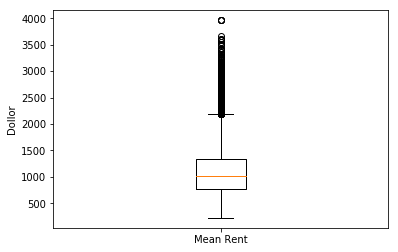

In [8]:
plt.boxplot(data["rent_mean"])
plt.xticks([1],["Mean Rent"])
plt.ylabel("Dollor")
plt.show()

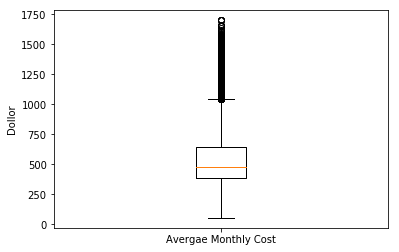

In [9]:
plt.boxplot(data["hc_mean"])
plt.xticks([1],["Avergae Monthly Cost"])
plt.ylabel("Dollor")
plt.show()

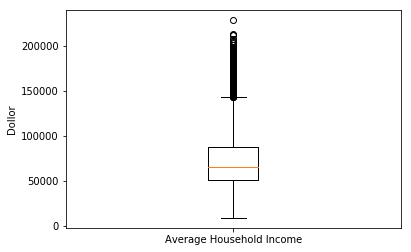

In [10]:
plt.boxplot(data["hi_mean"])
plt.xticks([1],["Average Household Income"])
plt.ylabel("Dollor")
plt.show()

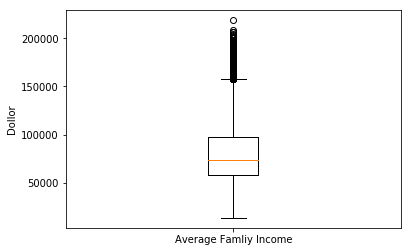

In [11]:
plt.boxplot(data["family_mean"])
plt.xticks([1],["Average Famliy Income"])
plt.ylabel("Dollor")
plt.show()

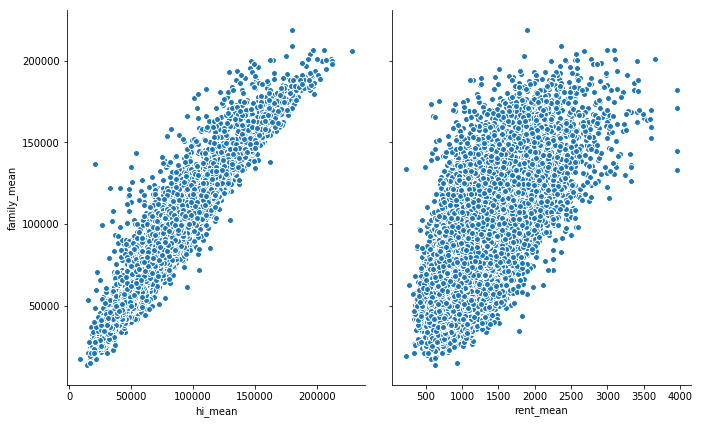

In [12]:
sns.pairplot(data, x_vars=['hi_mean','rent_mean'], y_vars='family_mean', size=6, aspect=0.8)

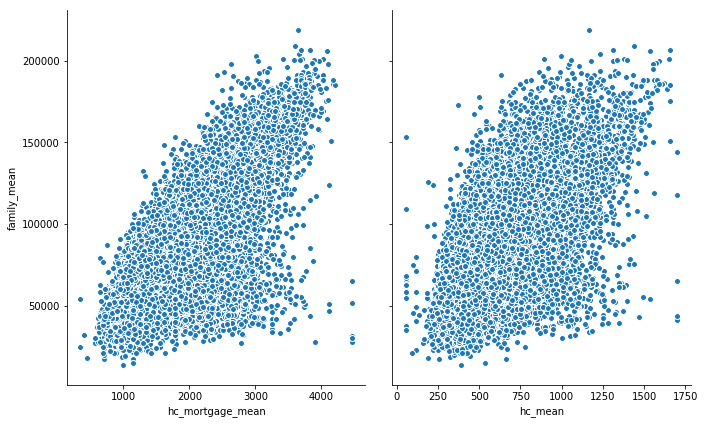

In [13]:
sns.pairplot(data, x_vars=['hc_mortgage_mean','hc_mean'], y_vars='family_mean', size=6, aspect=0.8)

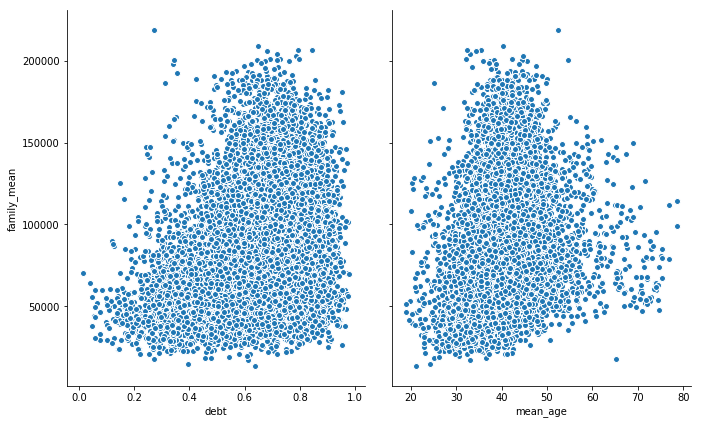

In [14]:
sns.pairplot(data, x_vars=['debt','mean_age'], y_vars='family_mean', size=6, aspect=0.8)

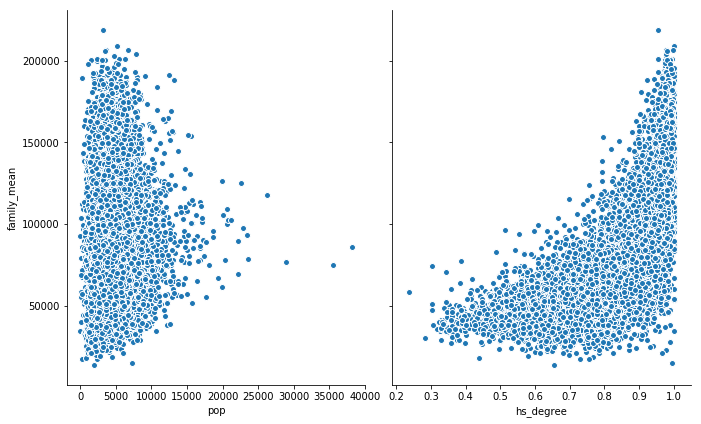

In [15]:
sns.pairplot(data, x_vars=['pop','hs_degree'], y_vars='family_mean', size=6, aspect=0.8)

In [16]:
data.head(5)

,STATEID,pop,rent_mean,hi_mean,family_mean,hc_mortgage_mean,hc_mean,debt,hs_degree,mean_age
0,2.0,4619.0,1366.24657,107394.63090,114330.20470,2266.22562,840.67205,0.72770,0.82841,36.130712
1,2.0,3727.0,2347.69441,136547.39120,148641.70830,2485.10777,712.33066,0.75689,0.94090,38.159337
3,2.0,1941.0,943.79086,66790.89936,78660.39446,2289.79186,491.86501,0.78212,0.89274,36.461372
4,2.0,5981.0,1372.84472,76752.81635,80981.17730,1904.16410,681.80199,0.67246,0.95351,34.536668
5,2.0,5476.0,1351.27532,81877.97542,84931.34713,2060.45716,667.73315,0.74685,0.87941,31.293813


In [17]:
data.min()

STATEID                 2.000000
pop                    38.000000
rent_mean             224.500000
hi_mean              8858.934220
family_mean         13584.317580
hc_mortgage_mean      349.500000
hc_mean                53.594610
debt                    0.015870
hs_degree               0.236880
mean_age               18.925883
dtype: float64

In [18]:
for attri in list(data.columns)[1:]:
    data[attri] = (data[attri]-data[attri].min())/(data[attri].max() - data[attri].min())*100
data.describe()

,STATEID,pop,rent_mean,hi_mean,family_mean,hc_mortgage_mean,hc_mean,debt,hs_degree,mean_age
count,21063.000000,21063.000000,21063.000000,21063.000000,21063.000000,21063.000000,21063.000000,21063.000000,21063.000000,21063.000000
mean,23.294687,11.589343,23.664898,28.716396,32.597179,33.492056,30.344468,65.064740,81.405288,34.503176
std,14.931324,5.491141,12.036856,13.476550,15.131360,16.263896,14.465518,14.792992,14.593058,9.167487
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,7.823031,14.707148,18.946558,21.647870,20.670007,20.199543,56.044321,74.615395,28.997931
50%,21.000000,10.867798,21.132990,25.708468,29.516265,29.103330,25.923953,66.874357,85.345686,34.297951
75%,36.000000,14.485589,29.760961,35.889068,41.078126,44.002279,36.125174,75.733408,91.999292,39.134158
max,56.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [19]:
data["famliyType"] = 0
for i in data.index:
    if data.loc[i].family_mean < 29.65:
        data.loc[i,"famliyType"] = 1
    else:
        data.loc[i,"famliyType"] = 2
data.head(10)

,STATEID,pop,rent_mean,hi_mean,family_mean,hc_mortgage_mean,hc_mean,debt,hs_degree,mean_age,famliyType
0,2.0,12.013847,30.545606,44.844137,49.138962,46.603431,47.800610,73.920268,77.514677,28.812918,2
1,2.0,9.674543,56.802675,58.111718,65.874451,51.925350,40.006210,76.951515,92.255478,32.210255,2
3,2.0,4.990690,19.243478,26.365156,31.740957,47.176423,26.616939,79.571534,85.944543,29.366674,2
4,2.0,15.585744,30.722129,30.898879,32.872923,37.800236,38.152149,68.183848,93.907904,26.143374,2
5,2.0,14.261362,30.145074,33.231367,34.799624,41.600359,37.297724,75.908907,84.197767,20.712566,2
6,2.0,15.354961,21.360270,25.626467,31.521923,36.936228,27.795050,62.907463,81.755163,27.433796,2
7,2.0,19.519551,23.472919,25.841152,30.536921,35.324981,41.174742,70.478831,83.821679,20.851750,2
8,2.0,14.326926,17.660212,19.887064,20.224857,38.670365,30.916515,41.639926,73.371160,20.445816,1
9,2.0,8.358029,20.526926,28.002250,30.127696,33.522672,35.244283,77.415704,80.600692,37.428846,2
10,2.0,8.858934,23.686390,22.501569,34.548637,30.662648,44.649020,64.175416,85.345686,37.035529,2


In [20]:
data.head(10)

,STATEID,pop,rent_mean,hi_mean,family_mean,hc_mortgage_mean,hc_mean,debt,hs_degree,mean_age,famliyType
0,2.0,12.013847,30.545606,44.844137,49.138962,46.603431,47.800610,73.920268,77.514677,28.812918,2
1,2.0,9.674543,56.802675,58.111718,65.874451,51.925350,40.006210,76.951515,92.255478,32.210255,2
3,2.0,4.990690,19.243478,26.365156,31.740957,47.176423,26.616939,79.571534,85.944543,29.366674,2
4,2.0,15.585744,30.722129,30.898879,32.872923,37.800236,38.152149,68.183848,93.907904,26.143374,2
5,2.0,14.261362,30.145074,33.231367,34.799624,41.600359,37.297724,75.908907,84.197767,20.712566,2
6,2.0,15.354961,21.360270,25.626467,31.521923,36.936228,27.795050,62.907463,81.755163,27.433796,2
7,2.0,19.519551,23.472919,25.841152,30.536921,35.324981,41.174742,70.478831,83.821679,20.851750,2
8,2.0,14.326926,17.660212,19.887064,20.224857,38.670365,30.916515,41.639926,73.371160,20.445816,1
9,2.0,8.358029,20.526926,28.002250,30.127696,33.522672,35.244283,77.415704,80.600692,37.428846,2
10,2.0,8.858934,23.686390,22.501569,34.548637,30.662648,44.649020,64.175416,85.345686,37.035529,2


In [21]:
formatData = data.drop(columns="family_mean")

In [22]:
formatData.head(10)

,STATEID,pop,rent_mean,hi_mean,hc_mortgage_mean,hc_mean,debt,hs_degree,mean_age,famliyType
0,2.0,12.013847,30.545606,44.844137,46.603431,47.800610,73.920268,77.514677,28.812918,2
1,2.0,9.674543,56.802675,58.111718,51.925350,40.006210,76.951515,92.255478,32.210255,2
3,2.0,4.990690,19.243478,26.365156,47.176423,26.616939,79.571534,85.944543,29.366674,2
4,2.0,15.585744,30.722129,30.898879,37.800236,38.152149,68.183848,93.907904,26.143374,2
5,2.0,14.261362,30.145074,33.231367,41.600359,37.297724,75.908907,84.197767,20.712566,2
6,2.0,15.354961,21.360270,25.626467,36.936228,27.795050,62.907463,81.755163,27.433796,2
7,2.0,19.519551,23.472919,25.841152,35.324981,41.174742,70.478831,83.821679,20.851750,2
8,2.0,14.326926,17.660212,19.887064,38.670365,30.916515,41.639926,73.371160,20.445816,1
9,2.0,8.358029,20.526926,28.002250,33.522672,35.244283,77.415704,80.600692,37.428846,2
10,2.0,8.858934,23.686390,22.501569,30.662648,44.649020,64.175416,85.345686,37.035529,2


In [23]:
formatData.to_csv(r'./Formatdata.csv',index=False,sep=',')